In [1]:
import pandas as pd
df = pd.read_csv('job_data_clean.csv')
df.head()

,jobName,custName,industry,workExp,salaryMin,manageResp,businessTrip,longitude,latitude,大學,...,軟體程式設計,資料庫軟體應用,系統架構規劃,軟體工程系統開發,資料庫系統管理維護,系統架構規劃與維護,系統整合分析,資料庫程式設計,提案與簡報技巧,county
0,(TMR- ) 資料分析(機器學習)開發工程師,新漢股份有限公司,電腦及其週邊設備製造業,3,40000,0,0,121.483505,25.007868,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,新北市
1,資料分析師,中華電信關係企業_神腦國際企業股份有限公司,電子通訊／電腦週邊零售業,2,40000,0,0,121.532805,24.985766,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,新北市
2,資訊類-大數據資料分析師,威剛科技股份有限公司,電腦及其週邊設備製造業,0,40000,0,0,121.486917,24.996549,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,新北市
3,Reporting & Data Quality Specialist (統計及資料分析專員),汎球生物科技股份有限公司,生化科技研發業,1,40000,0,0,121.448519,25.062759,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,新北市
4,物流資料分析員 Supply Chain Solutions Analyst,DSV Solutions_百及物流股份有限公司,儲配／運輸物流業,1,32000,0,0,121.330782,24.966771,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,新北市


In [61]:
# 確認有哪一些欄位
print(df.columns.tolist())

['jobName', 'custName', 'industry', 'workExp', 'salaryMin', 'manageResp', 'businessTrip', 'longitude', 'latitude', '大學', '碩士', '專科', '博士', '高中', '資訊工程相關', '電機電子工程相關', '其他數學及電算機科學相關', '資訊管理相關', '數理統計相關', '數學及電算機科學學科類', '應用數學相關', '商業及管理學科類', '工程學科類', '其他科系', '統計學相關', 'Python', 'R', 'MS SQL', 'MySQL', 'Oracle', '其他擅長工具', 'Excel', 'PowerPoint', 'Word', 'Linux', 'Java', 'Machine Learning', '其他技能', '軟體程式設計', '資料庫軟體應用', '系統架構規劃', '軟體工程系統開發', '資料庫系統管理維護', '系統架構規劃與維護', '系統整合分析', '資料庫程式設計', '提案與簡報技巧', 'county']


### 按照產業分析

In [41]:
df_in_count = df.groupby('industry').count()
df_in_count.head()

,jobName,custName,workExp,salaryMin,manageResp,businessTrip,longitude,latitude,大學,碩士,...,軟體程式設計,資料庫軟體應用,系統架構規劃,軟體工程系統開發,資料庫系統管理維護,系統架構規劃與維護,系統整合分析,資料庫程式設計,提案與簡報技巧,county
industry,,,,,,,,,,,,,,,,,,,,,
IC設計相關業,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
不動產經營業,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
人力仲介代徵,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
人身保險業,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
人造纖維製造業,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [60]:
# 取得個數超過5個的產業，畢業樣本數過少
df_in_count = df_in_count[ df_in_count['jobName'] > 5]
print(df_in_count.index.tolist())

['不動產經營業', '人身保險業', '其他專業／科學及技術業', '其他電子零組件相關業', '其它軟體及網路相關業', '半導體製造業', '工商顧問服務業', '廣告行銷公關業', '政府／民意機關', '會計服務業', '消費性電子產品製造業', '生化科技研發業', '產物保險業', '百貨相關業', '網際網路相關業', '證券及期貨業', '金融控股業', '銀行業', '電信相關業', '電子通訊／電腦週邊批發業', '電腦及其週邊設備製造業', '電腦系統整合服務業', '電腦軟體服務業']


In [44]:
# 移除無法進行groupby的columns
df_in = df.drop(columns = ['jobName','custName','county', 'longitude','latitude',])

In [62]:
# 篩選剛剛選出來合格的產業
df_in_mean = df_in.groupby('industry').mean().sort_values('industry', ascending=False)
df_in_mean = df_in_mean.loc[df_in_count.index.tolist()]
df_in_mean.head()

,workExp,salaryMin,manageResp,businessTrip,大學,碩士,專科,博士,高中,資訊工程相關,...,其他技能,軟體程式設計,資料庫軟體應用,系統架構規劃,軟體工程系統開發,資料庫系統管理維護,系統架構規劃與維護,系統整合分析,資料庫程式設計,提案與簡報技巧
industry,,,,,,,,,,,,,,,,,,,,,
不動產經營業,1.857143,39285.714286,0.000000,0.000000,1.000000,1.0,0.285714,0.714286,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.142857,0.000000,0.000000,0.000000,0.0
人身保險業,1.357143,39285.714286,0.071429,0.071429,0.857143,1.0,0.071429,0.642857,0.000000,0.142857,...,0.000000,0.000000,0.071429,0.000000,0.0,0.071429,0.000000,0.000000,0.071429,0.0
其他專業／科學及技術業,0.000000,40000.000000,0.000000,0.250000,0.000000,1.0,0.000000,0.750000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
其他電子零組件相關業,0.857143,34214.285714,0.000000,0.571429,0.571429,1.0,0.285714,0.571429,0.000000,0.142857,...,0.142857,0.000000,0.142857,0.000000,0.0,0.142857,0.000000,0.000000,0.000000,0.0
其它軟體及網路相關業,1.900000,39766.666667,0.033333,0.233333,0.800000,1.0,0.133333,0.700000,0.033333,0.333333,...,0.200000,0.133333,0.100000,0.133333,0.1,0.066667,0.033333,0.133333,0.100000,0.0


In [240]:
# 之後未來繪圖可以使用的畫圖函數
def job_plot(table_name, table_title):
    %matplotlib inline
    from matplotlib import pyplot as plt
    name_list = table_name.index.tolist()
    plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
    plt.figure(figsize=(15,8))
    plt.bar(name_list, table_name.values.tolist(), alpha=0.9, width = 0.8, color='orange', label=table_title, lw=1)
    plt.legend(loc="upper left")
    for i in range(len(name_list)):
        plt.annotate('{}'.format(round(table_name.values.tolist()[i],2)),xy=(name_list[i], table_name.values.tolist()[i]*1.01))
    plt.ylim(min(table_name.values.tolist())*0.9,max(table_name.values.tolist())*1.1)
#     plt.savefig('數據工作所需學歷.png')

#### 看一下薪水跟工作經驗的需求

* 起薪高的資料分析師產業以軟體業、電腦產業居多，同時工作年資多集中在2年左右
* 第一名的生科研發業薪水最高，但相應的需要負擔管理與出差

In [241]:
# 看一下薪水跟工作經驗的需求
df_in_mean[['salaryMin','workExp','manageResp','businessTrip']].sort_values('salaryMin',ascending=False).head(10)

,salaryMin,workExp,manageResp,businessTrip
industry,,,,
生化科技研發業,42500.000000,2.875000,0.125000,0.375000
電腦軟體服務業,41666.666667,1.694444,0.027778,0.263889
電腦系統整合服務業,40783.325000,2.000000,0.025000,0.150000
其他專業／科學及技術業,40000.000000,0.000000,0.000000,0.250000
網際網路相關業,39793.634921,1.777778,0.031746,0.015873
其它軟體及網路相關業,39766.666667,1.900000,0.033333,0.233333
電信相關業,39750.000000,2.250000,0.000000,0.000000
電子通訊／電腦週邊批發業,39666.666667,2.000000,0.166667,0.000000
會計服務業,39333.333333,1.444444,0.111111,0.666667


industry
生化科技研發業        42500.000000
電腦軟體服務業        41666.666667
電腦系統整合服務業      40783.325000
其他專業／科學及技術業    40000.000000
網際網路相關業        39793.634921
其它軟體及網路相關業     39766.666667
電信相關業          39750.000000
Name: salaryMin, dtype: float64


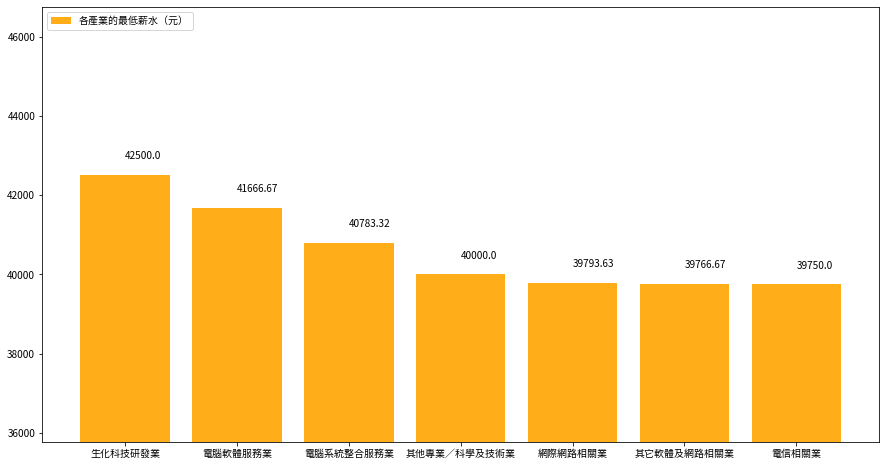

In [244]:
# 分析各個產業的起薪
df_salaryMin = df_in_mean[['salaryMin','workExp','manageResp','businessTrip']].sort_values('salaryMin',ascending=False).head(7)['salaryMin']
print(df_salaryMin)
job_plot(df_salaryMin,'各產業的最低薪水（元）')

industry
生化科技研發業         2.875000
銀行業             2.684211
金融控股業           2.483871
電信相關業           2.250000
百貨相關業           2.142857
電腦系統整合服務業       2.000000
電子通訊／電腦週邊批發業    2.000000
Name: workExp, dtype: float64


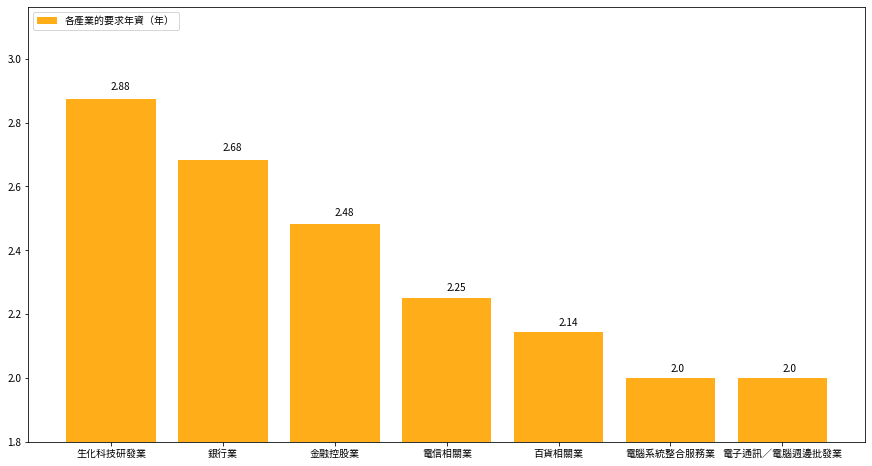

In [245]:
# 分析各個產業的起薪
df_workExp = df_in_mean[['salaryMin','workExp','manageResp','businessTrip']].sort_values('workExp',ascending=False).head(7)['workExp']
print(df_workExp)
job_plot(df_workExp,'各產業的要求年資（年）')

#### 各個產業需要的學歷背景

* 每個產業對於資工系的需求還是最高的，尤其是政府民意機關、生化還有電腦製造類
* 證券、金控、電信、百貨對於資工系的要求是最低，同時需要有其他專業學位的分析師加入
* 作為轉職者，證券、金控、電信、百貨、廣告業分析師是個不錯的轉職產業

In [70]:
major_list = ['資訊工程相關', '電機電子工程相關', '其他數學及電算機科學相關', '資訊管理相關', '數理統計相關', '數學及電算機科學學科類', '應用數學相關', '商業及管理學科類', '工程學科類', '其他科系', '統計學相關']
df_in_mean[major_list].sort_values('資訊工程相關', ascending=False).head(10)

,資訊工程相關,電機電子工程相關,其他數學及電算機科學相關,資訊管理相關,數理統計相關,數學及電算機科學學科類,應用數學相關,商業及管理學科類,工程學科類,其他科系,統計學相關
industry,,,,,,,,,,,
其他專業／科學及技術業,1.000000,0.750000,0.000000,0.375000,0.125000,0.500000,0.000000,0.000000,0.000000,0.125000,0.000000
政府／民意機關,0.866667,0.000000,0.000000,0.133333,0.000000,0.000000,0.000000,0.000000,0.400000,0.266667,0.066667
生化科技研發業,0.750000,0.250000,0.125000,0.375000,0.375000,0.000000,0.375000,0.125000,0.000000,0.125000,0.000000
電腦及其週邊設備製造業,0.720000,0.320000,0.040000,0.360000,0.080000,0.160000,0.000000,0.000000,0.080000,0.240000,0.080000
消費性電子產品製造業,0.571429,0.214286,0.000000,0.428571,0.071429,0.214286,0.000000,0.142857,0.000000,0.214286,0.071429
半導體製造業,0.545455,0.272727,0.181818,0.363636,0.181818,0.090909,0.045455,0.000000,0.000000,0.409091,0.045455
產物保險業,0.428571,0.000000,0.285714,0.000000,0.285714,0.000000,0.142857,0.000000,0.000000,0.285714,0.285714
電腦軟體服務業,0.375000,0.097222,0.083333,0.208333,0.152778,0.055556,0.055556,0.013889,0.041667,0.055556,0.097222
銀行業,0.368421,0.052632,0.052632,0.368421,0.105263,0.105263,0.000000,0.000000,0.000000,0.000000,0.105263


industry
其他專業／科學及技術業    1.000000
政府／民意機關        0.866667
生化科技研發業        0.750000
電腦及其週邊設備製造業    0.720000
消費性電子產品製造業     0.571429
半導體製造業         0.545455
產物保險業          0.428571
Name: 資訊工程相關, dtype: float64


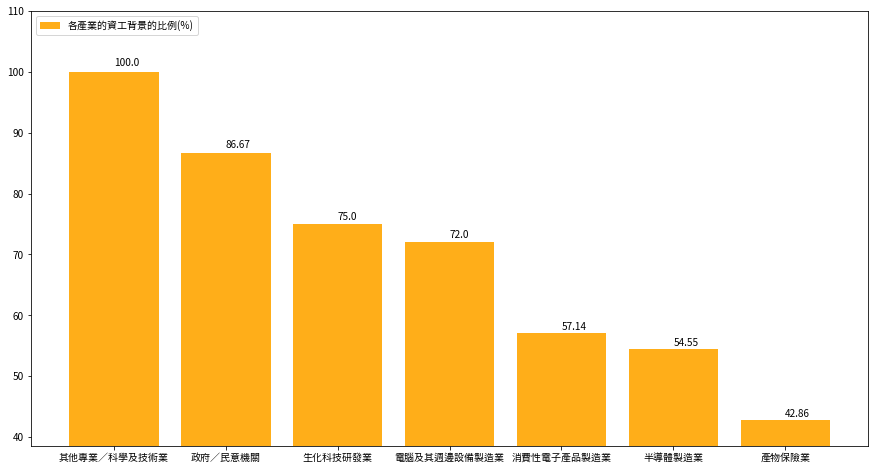

In [247]:
# 分析各個產業的主修專業，用資工來做排序
df_major = df_in_mean[major_list].sort_values('資訊工程相關', ascending=False).head(7)['資訊工程相關']
print(df_major)
job_plot(df_major*100,'各產業的資工背景的比例(%)')

industry
不動產經營業          0.000000
電子通訊／電腦週邊批發業    0.000000
廣告行銷公關業         0.000000
人身保險業           0.142857
其他電子零組件相關業      0.142857
百貨相關業           0.142857
工商顧問服務業         0.230769
Name: 資訊工程相關, dtype: float64


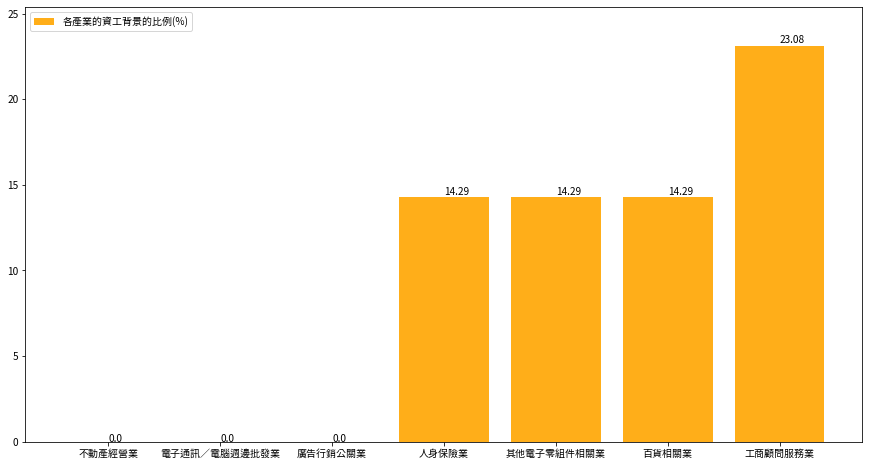

In [248]:
# 分析各個產業的主修專業，用資工來做排序
df_major_de = df_in_mean[major_list].sort_values('資訊工程相關').head(7)['資訊工程相關']
print(df_major_de)
job_plot(df_major_de*100,'各產業的資工背景的比例(%)')

#### 各個產業需要什麼工具

* 多數電腦、軟體業都會需要python語言，比例多在3成左右
* SQL的相關技能已經非常多產業有所需求，尤其是MS SQL的需求比MySQL的需求還要多
* MS SQL的需求集中在非電腦、軟體產業，例如不動產、證券、電信、產險等

In [249]:
tool_list = ['Python', 'R', 'MS SQL', 'MySQL', 'Oracle','Linux', 'Java']
df_tool = df_in_mean[tool_list].sort_values('Python', ascending=False).head(7)
df_tool

,Python,R,MS SQL,MySQL,Oracle,Linux,Java
industry,,,,,,,
不動產經營業,0.428571,0.000,0.571429,0.285714,0.000,0.000000,0.000000
其他專業／科學及技術業,0.375000,0.000,0.000000,0.000000,0.000,0.000000,0.375000
電信相關業,0.375000,0.375,0.375000,0.000000,0.125,0.000000,0.000000
其它軟體及網路相關業,0.366667,0.100,0.133333,0.033333,0.000,0.166667,0.066667
電腦及其週邊設備製造業,0.360000,0.000,0.160000,0.000000,0.040,0.040000,0.120000
消費性電子產品製造業,0.357143,0.000,0.142857,0.071429,0.000,0.000000,0.142857
電腦系統整合服務業,0.350000,0.050,0.275000,0.150000,0.100,0.050000,0.100000


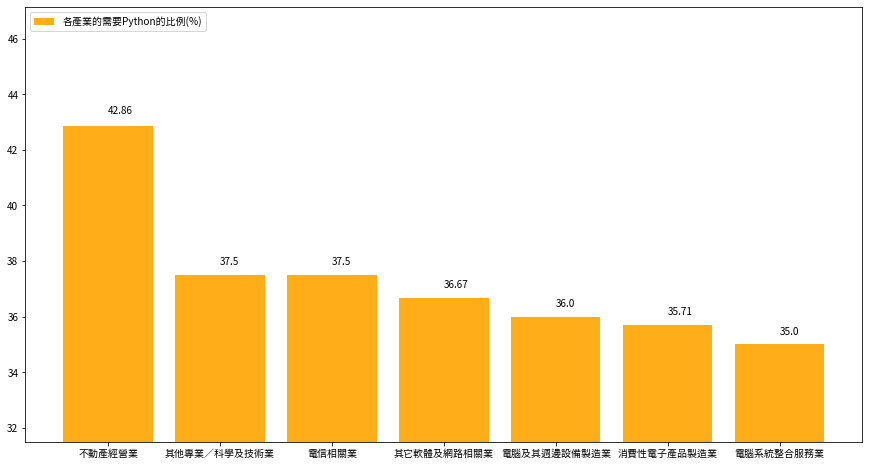

In [250]:
job_plot(df_tool['Python']*100,'各產業的需要Python的比例(%)')

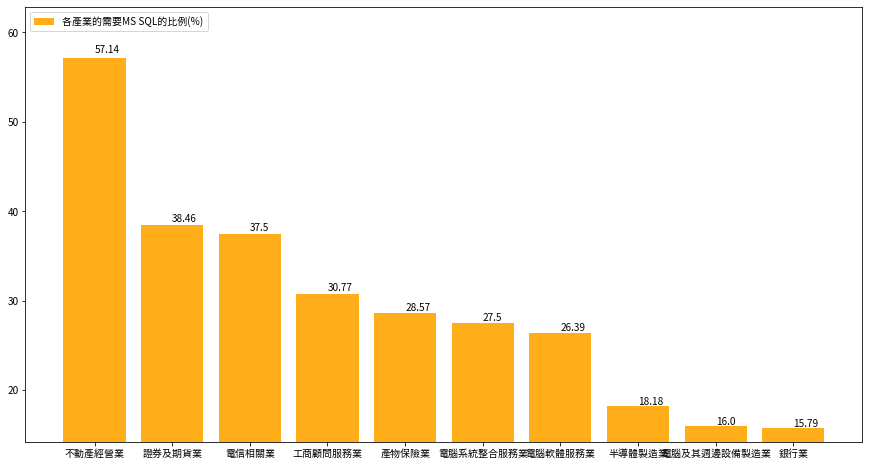

In [251]:
# MS SQL的熱門產業
df_mssql = df_in_mean[tool_list].sort_values('MS SQL', ascending=False).head(10)['MS SQL']
job_plot(df_mssql*100,'各產業的需要MS SQL的比例(%)')

#### 工作技能分析

* 工作技能集中在資料庫的使用，尤其是資料庫軟體的應用
* 資料庫系統管理維護、資料庫程式設計也是熱門技能，在電腦、軟體業

In [252]:
skill_list = ['軟體程式設計', '資料庫軟體應用', '系統架構規劃', '軟體工程系統開發', '資料庫系統管理維護', '系統整合分析', '資料庫程式設計']
df_skill = df_in_mean[skill_list].sort_values('資料庫軟體應用', ascending=False).head(7)
df_skill

,軟體程式設計,資料庫軟體應用,系統架構規劃,軟體工程系統開發,資料庫系統管理維護,系統整合分析,資料庫程式設計
industry,,,,,,,
電腦軟體服務業,0.222222,0.236111,0.055556,0.055556,0.180556,0.069444,0.222222
電腦系統整合服務業,0.100000,0.175000,0.050000,0.025000,0.225000,0.050000,0.050000
廣告行銷公關業,0.076923,0.153846,0.000000,0.000000,0.000000,0.076923,0.000000
其他電子零組件相關業,0.000000,0.142857,0.000000,0.000000,0.142857,0.000000,0.000000
網際網路相關業,0.079365,0.111111,0.047619,0.000000,0.095238,0.015873,0.079365
其它軟體及網路相關業,0.133333,0.100000,0.133333,0.100000,0.066667,0.133333,0.100000
半導體製造業,0.090909,0.090909,0.000000,0.045455,0.090909,0.000000,0.045455


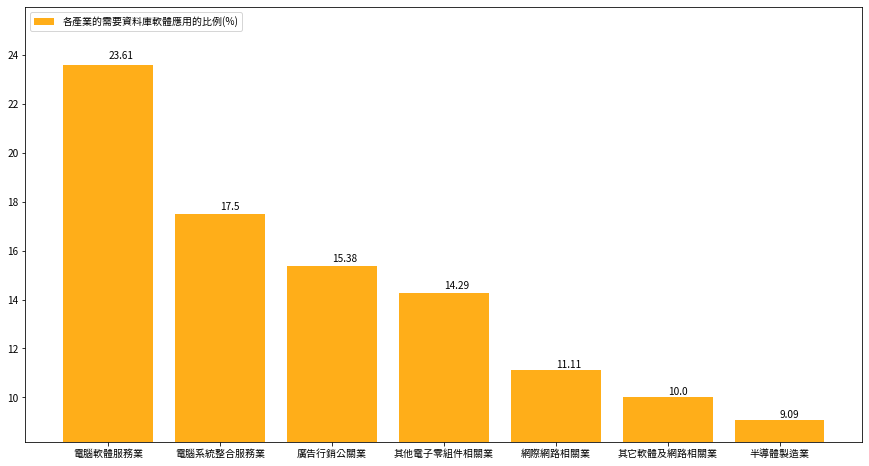

In [253]:
job_plot(df_skill['資料庫軟體應用']*100,'各產業的需要資料庫軟體應用的比例(%)')

### 按照地區進行分析

In [103]:
df_county_count = df.groupby('county').count()
df_county_count.head()

,jobName,custName,industry,workExp,salaryMin,manageResp,businessTrip,longitude,latitude,大學,...,其他技能,軟體程式設計,資料庫軟體應用,系統架構規劃,軟體工程系統開發,資料庫系統管理維護,系統架構規劃與維護,系統整合分析,資料庫程式設計,提案與簡報技巧
county,,,,,,,,,,,,,,,,,,,,,
其他縣市,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
台中市,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
台北市,379,379,379,379,379,379,379,379,379,379,...,379,379,379,379,379,379,379,379,379,379
台南市,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
新北市,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56


In [104]:
# 取得個數超過5個的產業，畢業樣本數過少
df_county_count = df_county_count[ df_county_count['jobName'] > 5]
print(df_county_count.index.tolist())

['其他縣市', '台中市', '台北市', '台南市', '新北市', '新竹市', '新竹縣', '桃園市', '高雄市']


In [105]:
# 移除無法進行groupby的columns
df_county = df.drop(columns = ['jobName','custName','industry', 'longitude','latitude',])

In [114]:
# 篩選剛剛選出來合格的產業
df_county_mean = df_county.groupby('county').mean().sort_values('county', ascending=False)
df_county_mean = df_county_mean.loc[df_county_count.index.tolist()]
df_county_mean.sort_values('salaryMin', ascending = False)

,workExp,salaryMin,manageResp,businessTrip,大學,碩士,專科,博士,高中,資訊工程相關,...,其他技能,軟體程式設計,資料庫軟體應用,系統架構規劃,軟體工程系統開發,資料庫系統管理維護,系統架構規劃與維護,系統整合分析,資料庫程式設計,提案與簡報技巧
county,,,,,,,,,,,,,,,,,,,,,
台北市,1.857520,39184.931398,0.044855,0.158311,0.910290,0.936675,0.208443,0.643799,0.021108,0.316623,...,0.155673,0.058047,0.094987,0.026385,0.013193,0.073879,0.026385,0.023747,0.065963,0.026385
其他縣市,0.875000,39000.000000,0.000000,0.375000,0.625000,1.000000,0.250000,0.375000,0.000000,0.625000,...,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
桃園市,1.772727,38500.000000,0.045455,0.409091,0.681818,1.000000,0.181818,0.454545,0.000000,0.500000,...,0.181818,0.136364,0.090909,0.045455,0.090909,0.045455,0.045455,0.136364,0.045455,0.000000
新北市,1.821429,37863.089286,0.000000,0.160714,0.857143,1.000000,0.232143,0.535714,0.000000,0.321429,...,0.089286,0.089286,0.017857,0.000000,0.017857,0.053571,0.000000,0.017857,0.035714,0.017857
新竹市,1.333333,37333.333333,0.000000,0.153846,0.692308,0.948718,0.128205,0.589744,0.000000,0.769231,...,0.051282,0.076923,0.102564,0.025641,0.025641,0.051282,0.000000,0.025641,0.076923,0.000000
高雄市,1.363636,36636.363636,0.090909,0.272727,0.727273,1.000000,0.090909,0.454545,0.000000,0.454545,...,0.181818,0.181818,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000
台中市,1.244444,36144.444444,0.022222,0.155556,0.866667,0.933333,0.222222,0.600000,0.066667,0.444444,...,0.111111,0.200000,0.266667,0.088889,0.066667,0.266667,0.066667,0.066667,0.266667,0.022222
新竹縣,0.500000,35428.571429,0.000000,0.000000,0.500000,0.857143,0.142857,0.642857,0.000000,0.500000,...,0.214286,0.000000,0.142857,0.071429,0.000000,0.142857,0.000000,0.000000,0.142857,0.000000
台南市,0.333333,35000.000000,0.000000,0.333333,0.666667,0.888889,0.222222,0.222222,0.111111,0.777778,...,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000


#### 根據地區分析薪資與年資

* 地區薪資以北部較高，依序是台北市、桃園市、新北市等首都圈的區域
* 地區要求的年資也跟薪資類似，依序為台北、新北、桃園

In [235]:
# 設計一個函數去排序
def county_rank(col_name):
    return df_county_mean.sort_values(col_name, ascending = False)[col_name]

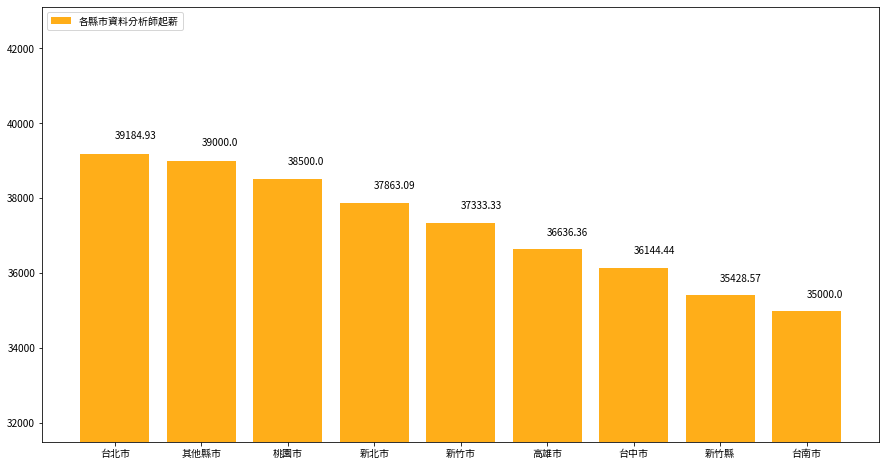

In [257]:
job_plot(county_rank('salaryMin'),'各縣市資料分析師起薪')

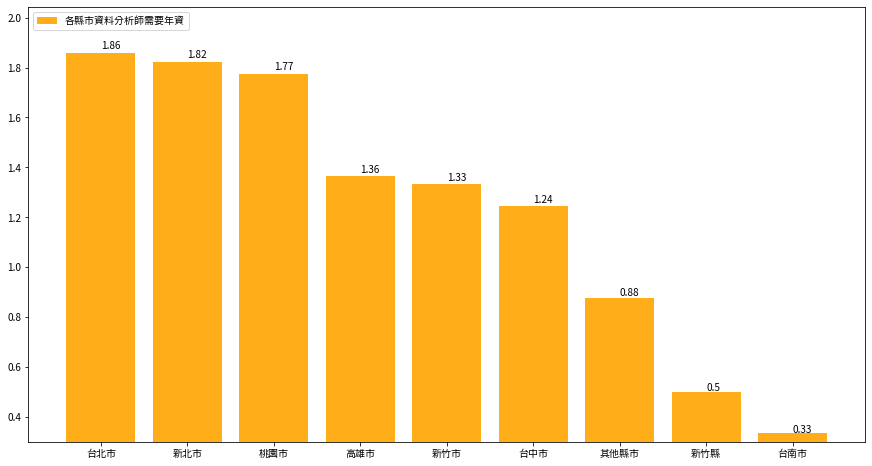

In [256]:
job_plot(county_rank('workExp'),'各縣市資料分析師需要年資')